In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use('seaborn')

In [2]:
df = pd.read_csv("D:\PROGRAMMING\DATASETS\Random_1.csv")
df

,Index,User ID,Gender,Age,Estimated Salary,Purchased
0,0,15624510,Male,19,19000,0
1,1,15810944,Male,35,20000,0
2,2,15668575,Female,26,43000,0
3,3,15603246,Female,27,57000,0
4,4,15804002,Male,19,76000,0
5,5,15728773,Male,27,58000,0
6,6,15598044,Female,27,84000,0
7,7,15694829,Female,32,150000,1
8,8,15600575,Male,25,33000,0
9,9,15727311,Female,35,65000,0


In [3]:
## Independet / Dependent
X = df.iloc[:, [3, 4]]
y = df[['Purchased']]

In [4]:
## Standard Scalling
sc = StandardScaler()
X = sc.fit_transform(X)

In [5]:
## Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [6]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [7]:
## Making predictions
y_predict = gnb.predict(X_test)

In [8]:
## Checking accuracy score
print(metrics.accuracy_score(y_test, y_predict))

1.0


In [9]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [10]:
print(metrics.confusion_matrix(y_test, y_predict))

[[3 0]
 [0 2]]


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

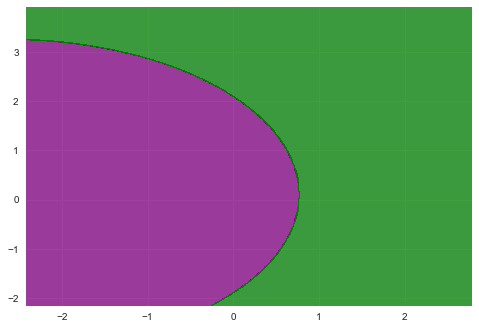

In [11]:
from matplotlib.colors import ListedColormap

# Assuming you have already defined your training data as x_train and y_train
x_set, y_set = X_train, y_train

# Create a meshgrid for plotting the decision boundary
X1, X2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

# Plot the decision boundary using contourf
plt.contourf(X1, X2, gnb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('purple', 'green')))

# Set the plot limits
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Scatter plot the data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('purple', 'green'))(i), label=str(j))

# Set title, axis labels, and legend
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
